In [1]:
### Library Imports
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, get_ADX, adx_mult_tickers, plot_function
from FilterFunctions import filter_indicators

In [2]:
# Function Call for Multiple Tickers
mult_tick_list = ['AAPL', 'GOOG']
start_date = '2022-01-01'
stock_data2 = import_stock_data(mult_tick_list, start_date)
#print(stock_data2.tail())
adx_df = adx_mult_tickers(stock_data2, mult_tick_list)
print(adx_df.tail())

[*********************100%%**********************]  2 of 2 completed


          AAPL                             GOOG                      
           ADX        DI+        DI-        ADX        DI+        DI-
582  20.160602  41.471171  15.391644  30.611187  45.748987  25.666124
583  19.726139  33.805395  24.029984  28.806485  40.083887  28.391144
584  18.387662  29.297350  24.122288  27.242409  36.080657  25.555684
585  17.874926  27.490958  20.510517  25.886878  33.352488  23.623340
586  23.613241  53.244788  12.933861  24.876474  32.568246  22.488067


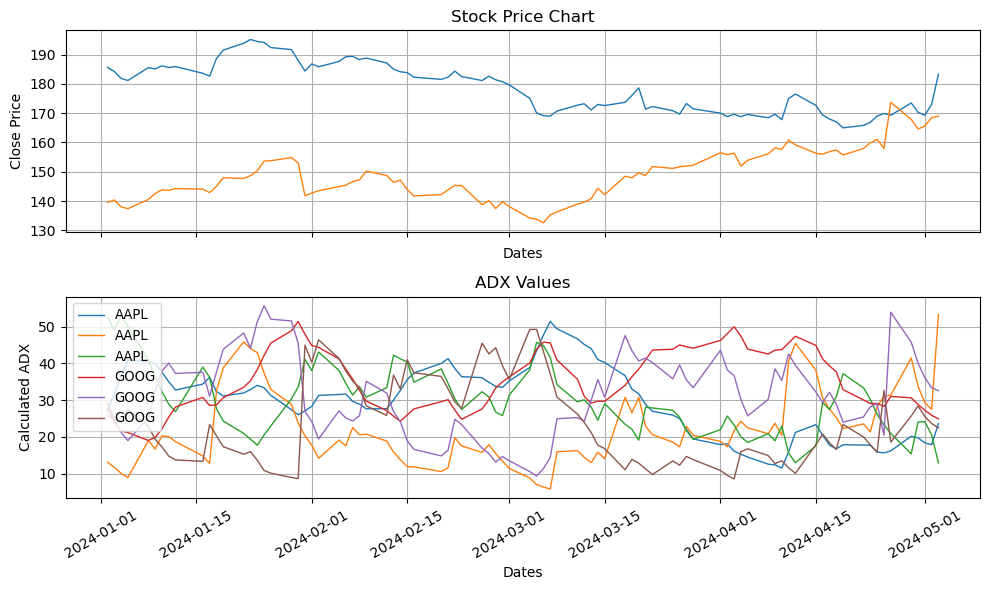

In [3]:
### Plot ADX
plot = plot_function(stock_data2, adx_df, tickers = mult_tick_list, indicator_type = 'ADX')
plot


In [4]:
### Apply Filtering Fuction
# Define thresholds for ADX
# ADX below 20: Indicates a weak trend or no trend
# ADX between 20 and 30: Suggests a developing trend
# ADX above 30: Indicates a strong trend
adx_buy_threshold = 25  # Example threshold for strong uptrend
adx_sell_threshold = 20  # Example threshold for strong downtrend
tickers = mult_tick_list

# Filter based on indicator values
filtered_df = filter_indicators(adx_df, adx_buy_threshold, adx_sell_threshold, adx_df.columns)
filtered_df.tail(5)

Tickers with potential BUY signals:
('AAPL', 'DI+'): 53.244788
('GOOG', 'DI+'): 32.568246

Tickers with potential SELL signals:
('AAPL', 'DI-'): 12.933861


AAPL                  GOOG
           DI+        DI-        DI+
582  41.471171  15.391644  45.748987
583  33.805395  24.029984  40.083887
584  29.297350  24.122288  36.080657
585  27.490958  20.510517  33.352488
586  53.244788  12.933861  32.568246